In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Load data
Quantity_per_Chrono = pd.read_excel('python_2_All_Pottery_Totals_per_Chrono_Qty.xlsx')
Weight_per_Chrono = pd.read_excel('python_3_All_Pottery_Totals_per_Chrono_Wt.xlsx')
Fine_quantity = pd.read_excel('2a_Fine_Pottery_Totals_per_Chrono_Qty.xlsx')
Medium_quantity = pd.read_excel('2b_MedCoarse_Pottery_Totals_per_Chrono_Qty.xlsx')
Coarse_quantity = pd.read_excel('2c_Coarse_Pottery_Totals_per_Chrono_Qty.xlsx')
Fine_weight = pd.read_excel('3a_Fine_Pottery_Totals_per_Chrono_Wt.xlsx')
Medium_weight = pd.read_excel('3b_MedCoarse_Pottery_Totals_per_Chrono_Wt.xlsx')
Coarse_weight = pd.read_excel('3c_Coarse_Pottery_Totals_per_Chrono_Wt.xlsx')

time_period_columns = ['05_Neo', '25_EBA', '35_MBA', '45_LBA', '55_PG']

# Classify regions
def classify_region(grsu):
    x = grsu[:2]
    y = int(grsu[2:5])
    if x >= 'LA' and x <= 'LI':
        return 'Northwest'
    elif x >= 'LK' and x <= 'LX' and y >= 782 and y <= 799:
        return 'Northeast'
    elif x >= 'LK' and x <= 'LS' and y >= 769 and y <= 780:
        return 'South'

for df in [Quantity_per_Chrono, Weight_per_Chrono, Fine_quantity, Fine_weight, Medium_quantity, Medium_weight, Coarse_quantity, Coarse_weight]:
    df['Region'] = df['GRSU'].apply(classify_region)

# Quantity data per region
Quantity_per_Chrono_nw = Quantity_per_Chrono[Quantity_per_Chrono['Region'] == 'Northwest'][time_period_columns]
Quantity_per_Chrono_ne = Quantity_per_Chrono[Quantity_per_Chrono['Region'] == 'Northeast'][time_period_columns]
Quantity_per_Chrono_s = Quantity_per_Chrono[Quantity_per_Chrono['Region'] == 'South'][time_period_columns]

Weight_per_Chrono_nw = Weight_per_Chrono[Weight_per_Chrono['Region'] == 'Northwest'][time_period_columns]
Weight_per_Chrono_ne = Weight_per_Chrono[Weight_per_Chrono['Region'] == 'Northeast'][time_period_columns]
Weight_per_Chrono_s = Weight_per_Chrono[Weight_per_Chrono['Region'] == 'South'][time_period_columns]

# Combine data
combined_data_q = pd.concat([Quantity_per_Chrono_nw, Quantity_per_Chrono_ne, Quantity_per_Chrono_s])
combined_regions_q = pd.concat([
    Quantity_per_Chrono[Quantity_per_Chrono['Region'] == 'Northwest']['Region'],
    Quantity_per_Chrono[Quantity_per_Chrono['Region'] == 'Northeast']['Region'],
    Quantity_per_Chrono[Quantity_per_Chrono['Region'] == 'South']['Region']
])

combined_data_w = pd.concat([Weight_per_Chrono_nw, Weight_per_Chrono_ne, Weight_per_Chrono_s])
combined_regions_w = pd.concat([
    Weight_per_Chrono[Weight_per_Chrono['Region'] == 'Northwest']['Region'],
    Weight_per_Chrono[Weight_per_Chrono['Region'] == 'Northeast']['Region'],
    Weight_per_Chrono[Weight_per_Chrono['Region'] == 'South']['Region']
])




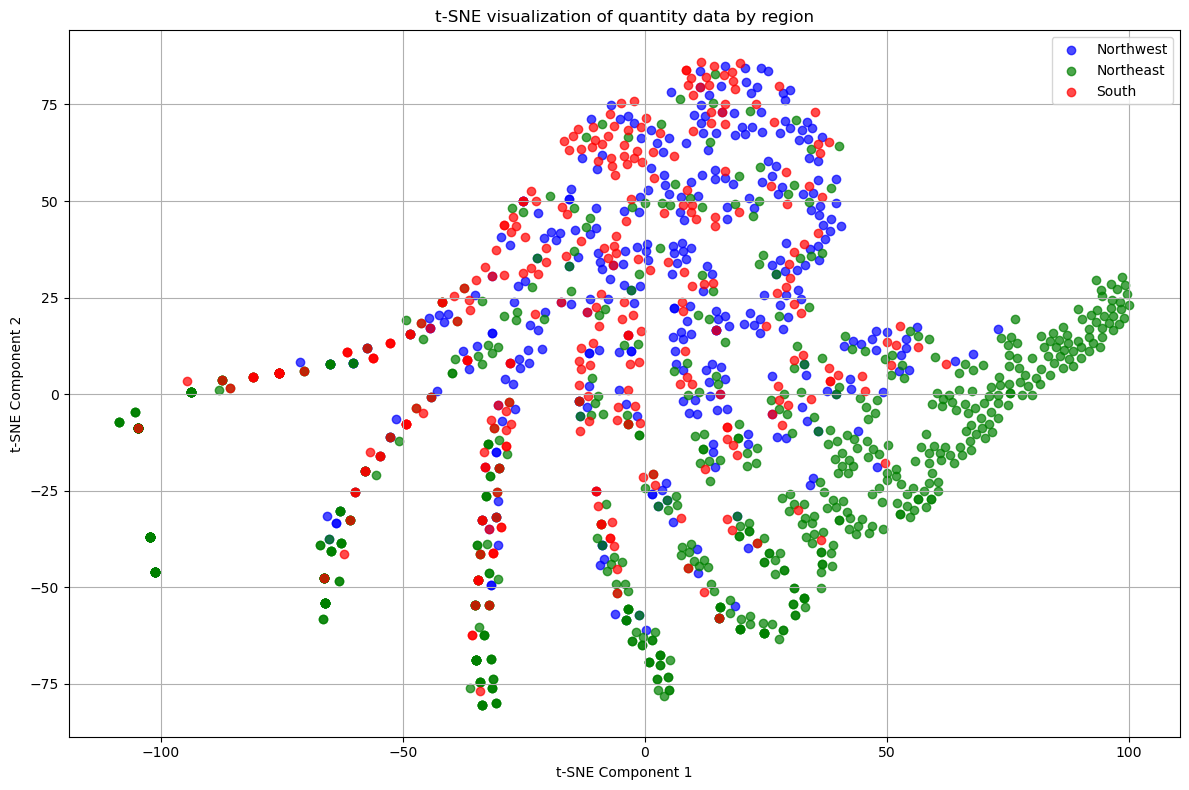

In [5]:
# Standardize the data
scaler = StandardScaler()
data_scaled_q = scaler.fit_transform(combined_data_q)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
data_pca_q = pca.fit_transform(data_scaled_q)

# Apply t-SNE to PCA-reduced data
tsne = TSNE(n_components=2, random_state=42)
data_tsne_q = tsne.fit_transform(data_pca_q)

# Plot t-SNE results with color distinction for regions
plt.figure(figsize=(12, 8))
colors = {'Northwest': 'blue', 'Northeast': 'green', 'South': 'red'}

for region in colors.keys():
    mask = (combined_regions_q == region)
    plt.scatter(data_tsne_q[mask, 0], data_tsne_q[mask, 1], color=colors[region], label=region, alpha=0.7)

plt.title('t-SNE visualization of quantity data by region')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


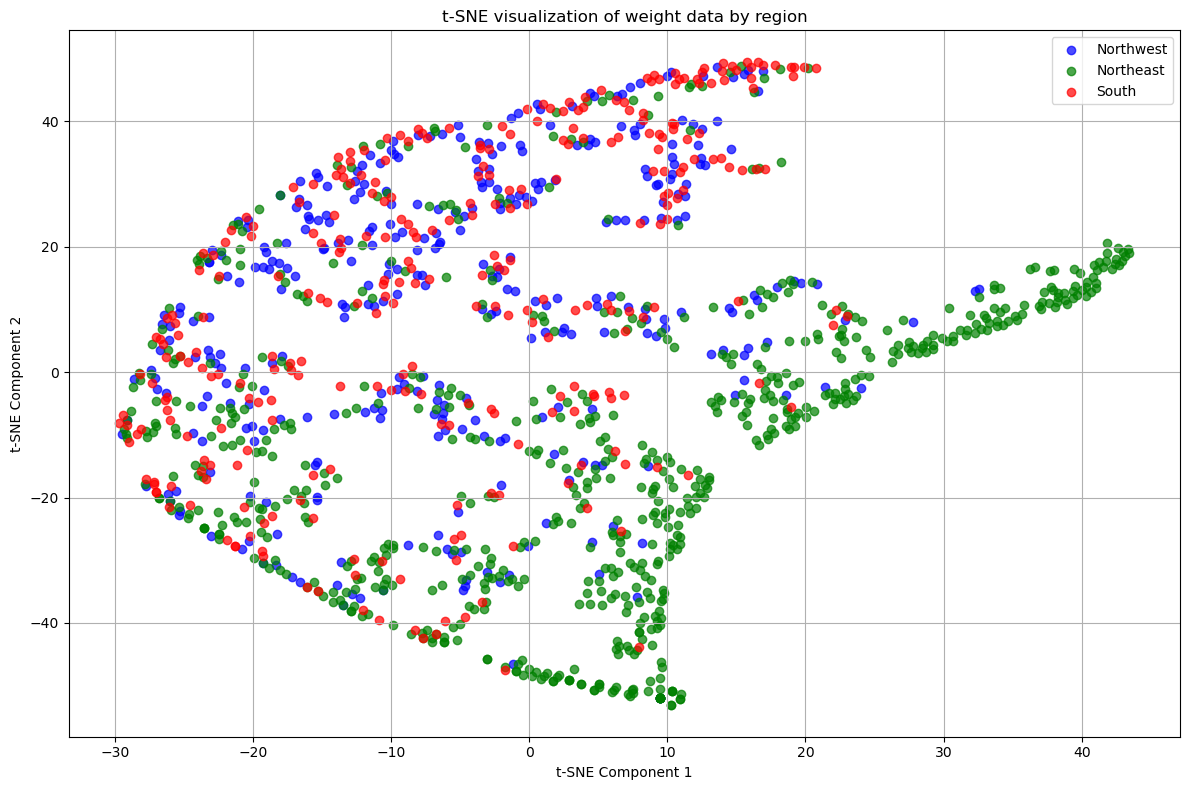

In [6]:
scaler = StandardScaler()
data_scaled_w = scaler.fit_transform(combined_data_w)

pca = PCA(n_components=2)
data_pca_w = pca.fit_transform(data_scaled_w)

tsne = TSNE(n_components=2, random_state=42)
data_tsne_w = tsne.fit_transform(data_pca_w)

plt.figure(figsize=(12, 8))
colors = {'Northwest': 'blue', 'Northeast': 'green', 'South': 'red'}

for region in colors.keys():
    mask = (combined_regions_w == region)
    plt.scatter(data_tsne_w[mask, 0], data_tsne_w[mask, 1], color=colors[region], label=region, alpha=0.7)

plt.title('t-SNE visualization of weight data by region')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
